In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

/Users/teenarai/DL_with_python/keras_dl_with_python/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
from keras import layers
from keras import models 


model = models.Sequential()
## what this layer does Conv2D
# Receives a grayscale image of size 28×28×1.
# Applies 32 filters (each of size 3×3).
# Slides each filter across the image to detect patterns (edges, corners, etc.).
# Applies ReLU activation, setting negative values to 0 (introducing non-linearity).
# Outputs a feature map that highlights important patterns.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 32 - number of filter(kernels), (3, 3) - filter size (kernel size) means each filter will scan 3x3 regions of the image
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/Users/teenarai/DL_with_python/keras_dl_with_python/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8702 - loss: 0.4051
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9843 - loss: 0.0496
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9900 - loss: 0.0314
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9934 - loss: 0.0226
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9943 - loss: 0.0184


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9888 - loss: 0.0376


0.9926000237464905

In [ ]:
import os, shutil

original_dataset_dir = '/Users/teenarai/DL_with_python/dogs-vs-cats/train'

base_dir = '/Users/teenarai/DL_with_python/cats_and_dogs_small/'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')                           #5
os.mkdir(train_dogs_dir)                                                   #5

validation_cats_dir = os.path.join(validation_dir, 'cats')                 #6
os.mkdir(validation_cats_dir)                                              #6

validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 #7
os.mkdir(validation_dogs_dir)  

test_cats_dir = os.path.join(test_dir, 'cats')                             #8
os.mkdir(test_cats_dir)                                                    #8

test_dogs_dir = os.path.join(test_dir, 'dogs')                             #9
os.mkdir(test_dogs_dir)  

fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]               #11
for fname in fnames:                                                       #11
    src = os.path.join(original_dataset_dir, fname)                        #11
    dst = os.path.join(validation_cats_dir, fname)                         #11
    shutil.copyfile(src, dst)                                              #11

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]               #12
for fname in fnames:                                                       #12
    src = os.path.join(original_dataset_dir, fname)                        #12
    dst = os.path.join(test_cats_dir, fname)                               #12
    shutil.copyfile(src, dst)                                              #12

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                     #13
for fname in fnames:                                                       #13
    src = os.path.join(original_dataset_dir, fname)                        #13
    dst = os.path.join(train_dogs_dir, fname)                              #13
    shutil.copyfile(src, dst)                                              #13
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]               #14
for fname in fnames:                                                       #14
    src = os.path.join(original_dataset_dir, fname)                        #14
    dst = os.path.join(validation_dogs_dir, fname)                         #14
    shutil.copyfile(src, dst)                                              #14

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]               #15
for fname in fnames:                                                       #15
    src = os.path.join(original_dataset_dir, fname)                        #15
    dst = os.path.join(test_dogs_dir, fname)                               #15
    shutil.copyfile(src, dst)                  

In [15]:
train_dir = '/Users/teenarai/DL_with_python/cats_and_dogs_small/train'
validation_dir = '/Users/teenarai/DL_with_python/cats_and_dogs_small/validation'
test_dir = '/Users/teenarai/DL_with_python/cats_and_dogs_small/test'

In [11]:
# instantiating a small convnet for dogs vs cats classification

model =  models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/Users/teenarai/DL_with_python/keras_dl_with_python/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from keras import optimizers
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics=['acc']
)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break 

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch=100, # batch size = 20 so 20 x 100 = 2000 images processed per epoch
    epochs=30, # model will go through entire dataset 30 times
    validation_data = validation_generator, # use validation dataset to evaluate the model at the end of each epoch 
    validation_steps= 50 # number of batches used for validation 50 x 20 = 1000 images used for validation
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 438ms/step - acc: 0.9828 - loss: 0.0466 - val_acc: 0.6950 - val_loss: 1.6261
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/30


2025-03-21 11:28:17.234028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)
2025-03-21 11:28:17.243131: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 426ms/step - acc: 0.9812 - loss: 0.0454 - val_acc: 0.6900 - val_loss: 1.9972
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/30


2025-03-21 11:29:00.087483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-21 11:29:00.101529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 435ms/step - acc: 0.9702 - loss: 0.0934 - val_acc: 0.6840 - val_loss: 1.8111
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/30


2025-03-21 11:29:44.160601: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-21 11:29:44.180768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 451ms/step - acc: 0.9913 - loss: 0.0366 - val_acc: 0.7200 - val_loss: 1.8048
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/30


2025-03-21 11:30:30.019435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-21 11:30:30.029653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 480ms/step - acc: 0.9856 - loss: 0.0516 - val_acc: 0.7070 - val_loss: 1.6301
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/30


2025-03-21 11:31:18.420492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-21 11:31:18.433947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 397ms/step - acc: 0.9989 - loss: 0.0043 - val_acc: 0.7090 - val_loss: 2.2139
Epoch 12/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/30


2025-03-21 11:31:58.581300: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-21 11:31:58.595628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 404ms/step - acc: 0.9975 - loss: 0.0083 - val_acc: 0.7060 - val_loss: 2.5042
Epoch 14/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/30


2025-03-21 11:32:39.350182: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-21 11:32:39.360807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 390ms/step - acc: 0.9882 - loss: 0.0382 - val_acc: 0.6970 - val_loss: 2.3084
Epoch 16/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/30


2025-03-21 11:33:18.597942: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-21 11:33:18.606930: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 429ms/step - acc: 0.9941 - loss: 0.0167 - val_acc: 0.7130 - val_loss: 2.3907
Epoch 18/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/30


2025-03-21 11:34:01.706531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-21 11:34:01.718277: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 438ms/step - acc: 0.9960 - loss: 0.0224 - val_acc: 0.7070 - val_loss: 2.8320
Epoch 20/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/30


2025-03-21 11:34:46.040679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-21 11:34:46.050953: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 441ms/step - acc: 0.9950 - loss: 0.0163 - val_acc: 0.7140 - val_loss: 2.4954
Epoch 22/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/30


2025-03-21 11:35:30.386594: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-21 11:35:30.397686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 408ms/step - acc: 0.9930 - loss: 0.0198 - val_acc: 0.6910 - val_loss: 3.1615
Epoch 24/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/30


2025-03-21 11:36:11.638909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-21 11:36:11.648059: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 408ms/step - acc: 0.9945 - loss: 0.0274 - val_acc: 0.6980 - val_loss: 3.1934
Epoch 26/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 27/30


2025-03-21 11:36:52.763346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-21 11:36:52.772720: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 405ms/step - acc: 0.9974 - loss: 0.0093 - val_acc: 0.6860 - val_loss: 3.9845
Epoch 28/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 29/30


2025-03-21 11:37:33.500902: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-21 11:37:33.510274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 417ms/step - acc: 0.9925 - loss: 0.0412 - val_acc: 0.6970 - val_loss: 3.6667
Epoch 30/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00


2025-03-21 11:38:15.546809: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-03-21 11:38:15.560077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [25]:
model.save('cats_and_dogs_small_1.h5')

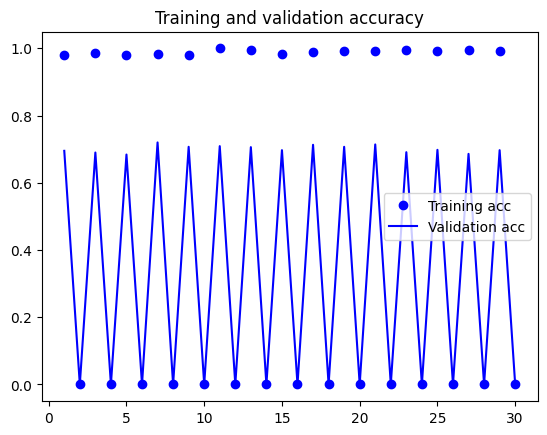

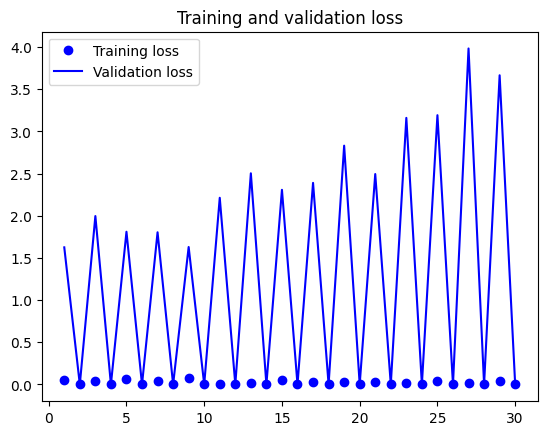

In [26]:
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()